# Importation des librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

#from confusion_matrix_pretty_print import print_confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV,KFold

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.tree import export_graphviz

import warnings

In [3]:
df = pd.read_csv('C:/Users/Dell inspiron 13/Desktop/ISDM/Breast Cancer Dataset.csv')

In [4]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,12.80,17.46,83.05,508.3,0.08044,1
1,11.06,14.83,70.31,378.2,0.07741,1
2,11.80,17.26,75.26,431.9,0.09087,1
3,17.91,21.02,124.40,994.0,0.12300,0
4,11.93,10.91,76.14,442.7,0.08872,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      119 non-null    float64
 1   mean_texture     119 non-null    float64
 2   mean_perimeter   119 non-null    float64
 3   mean_area        119 non-null    float64
 4   mean_smoothness  119 non-null    float64
 5   diagnosis        119 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 5.7 KB


##### 119 observations et 6 colonnes, pas de valeurs manquantes

### Correlation entre les variables

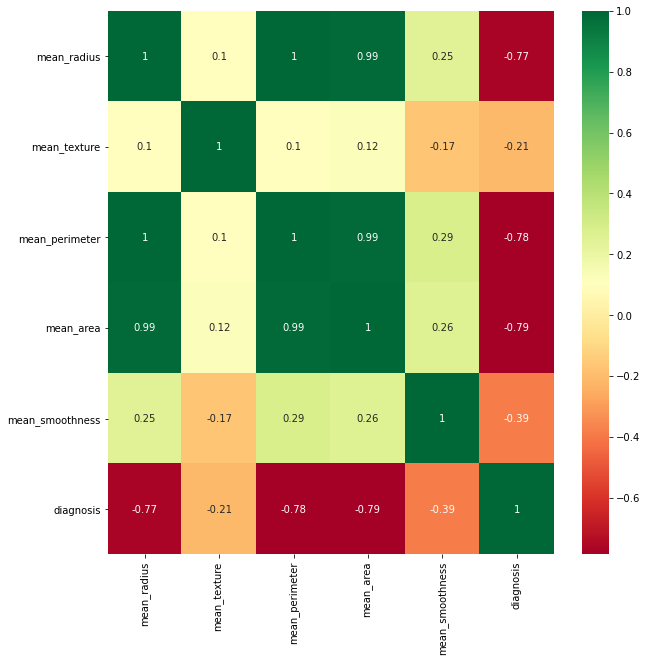

<Figure size 720x720 with 0 Axes>

In [6]:
# Find the most correlated attributes
corrmat = df.corr()
corr_var = corrmat.index[()]

# Plotting the correlation matrix
plt.figure(figsize=(10,10))
g = sns.heatmap(df[corr_var].corr(),
                annot=True,cmap="RdYlGn")

plt.figure(figsize=(10, 10))
plt.show()

In [7]:
df.groupby('diagnosis')['mean_perimeter'].mean()

diagnosis
0    119.851200
1     79.037021
Name: mean_perimeter, dtype: float64

In [8]:
df.groupby('diagnosis')['mean_radius'].mean()

diagnosis
0    18.072000
1    12.283096
Name: mean_radius, dtype: float64

In [9]:
df.groupby('diagnosis')['mean_perimeter'].median()

diagnosis
0    120.80
1     78.35
Name: mean_perimeter, dtype: float64

In [10]:
df.groupby('diagnosis')['mean_radius'].median()

diagnosis
0    18.03
1    12.27
Name: mean_radius, dtype: float64

On constate que que les moyenne et mediane sont a peu prs la meme chose pour chaque variable

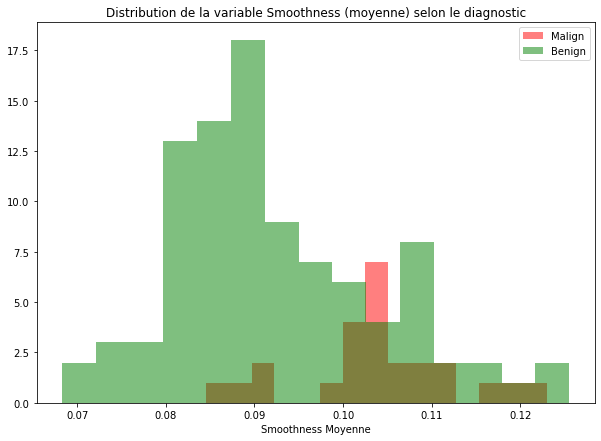

In [11]:
# on considere que la modalite 0 represente les patients en Malign et 1 Benign

plt.figure(figsize=(10,7))
plt.hist(df[df['diagnosis']== 0]['mean_smoothness'], bins=15, color='r',alpha = 0.5, label='Malign')
plt.hist(df[df['diagnosis']== 1]['mean_smoothness'], bins=15, color='g',alpha = 0.5, label='Benign')
plt.xlabel('Smoothness Moyenne')
plt.legend()
plt.title('Distribution de la variable Smoothness (moyenne) selon le diagnostic');

## Phase d'exploration des donnees

la heatmap nous montre qu'il existe de tres bonnes relations entre certines variables telles que: mean_radius, mean_perimeter et mean_area. Essayons a travers d'un graphique de boites a moustaches de voir d'autres variables en fonction de la variable cible 

<AxesSubplot:xlabel='diagnosis', ylabel='mean_perimeter'>

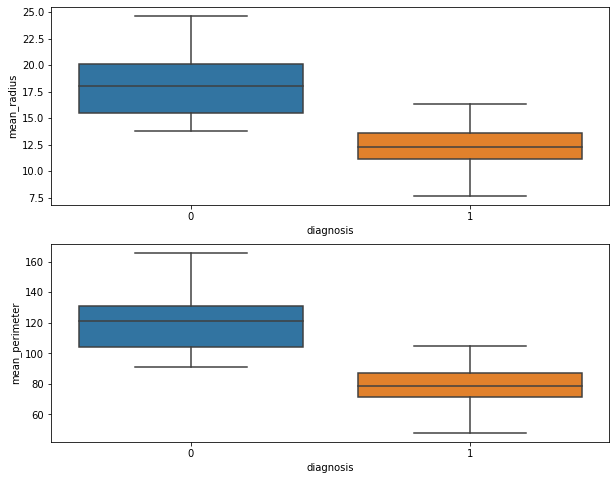

In [12]:
fig, axe = plt.subplots(figsize=(10,8), nrows=2, ncols=1)

sns.boxplot(x='diagnosis', y='mean_radius', data=df, ax=axe[0])
sns.boxplot(x='diagnosis', y='mean_perimeter', data=df, ax=axe[1])


<AxesSubplot:xlabel='diagnosis', ylabel='mean_smoothness'>

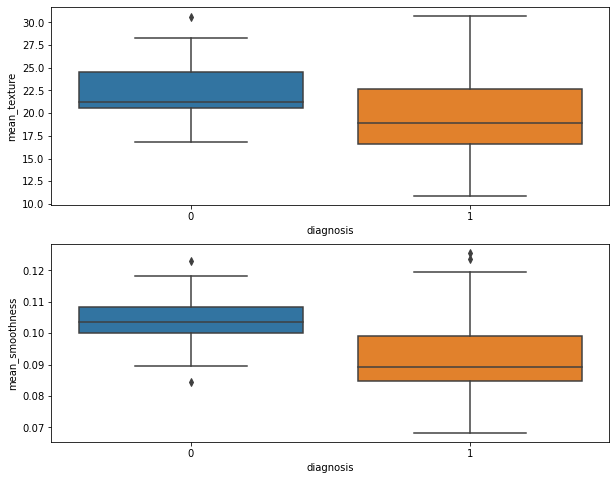

In [13]:
fig, axe = plt.subplots(figsize=(10,8), nrows=2, ncols=1)

sns.boxplot(x='diagnosis', y='mean_texture', data=df, ax=axe[0])
sns.boxplot(x='diagnosis', y='mean_smoothness', data=df, ax=axe[1])


## Remarques :
* la distribution des cas de malign et de benign different
* il n'y a pas beaucoup de valeurs aberrantes

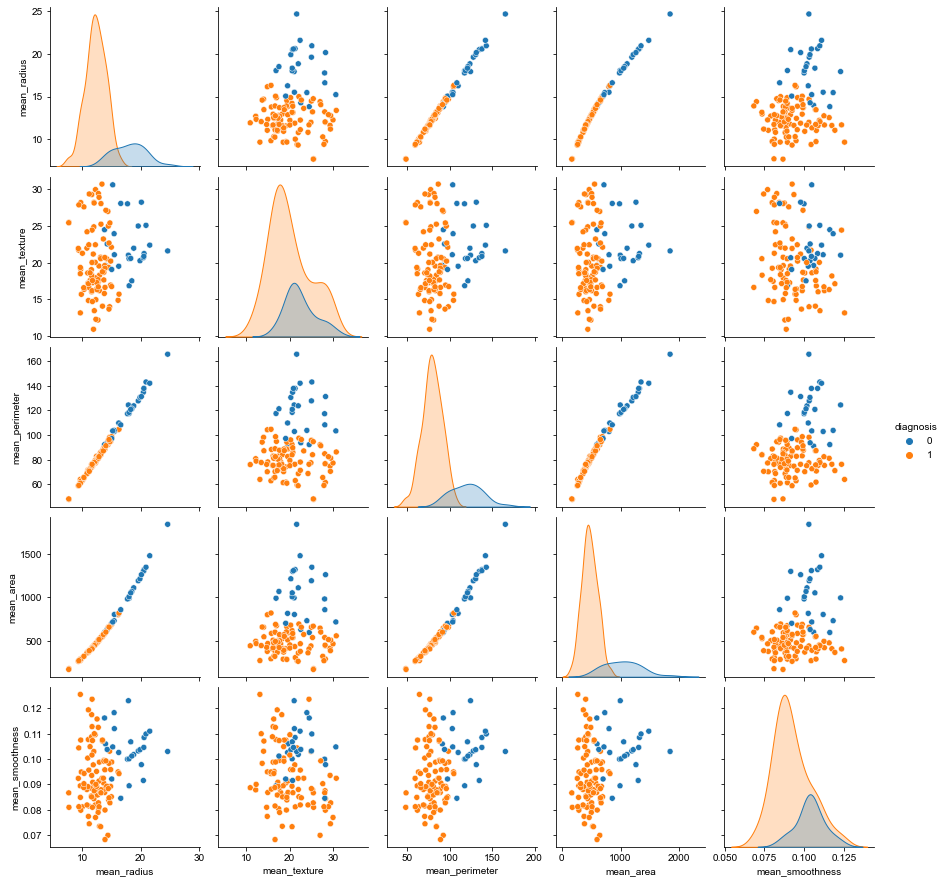

In [14]:
sns.pairplot(df, hue='diagnosis')
sns.set()
plt.show()

Au regard de ces pairplots, toutes les variables ont l'air d'etre correllees

In [15]:
## creation de deux datasets 
X = df.drop(columns='diagnosis')
y = df['diagnosis'] # cible


standardized = StandardScaler()
standardized.fit(X)
X_norme = standardized.transform(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
                                                     
                                                   

In [22]:
model =  DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [23]:

predictions = model.predict(X_test)

cm = confusion_matrix(y_test,predictions)

#print_confusion_matrix(cm, ['PAS DE CANCER','CANCER'], figsize = (10,7), fontsize=14)

print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        21

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [24]:
precision = metrics.accuracy_score(predictions,y_test)
print("La précision du modèle de la decision tree :  %s" % "{0:.2%}".format(precision))

La précision du modèle de la decision tree :  100.00%


In [25]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2, random_state=0)
                                                     
                                                    
model = LogisticRegression()
model.fit(X_train_,y_train_)
predictions_ = model.predict(X_test_)
print(classification_report(y_test_,predictions_))

warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.95      1.00      0.98        21

    accuracy                           0.96        24
   macro avg       0.98      0.83      0.89        24
weighted avg       0.96      0.96      0.95        24



In [26]:
# Précision du modèle 

precision = metrics.accuracy_score(predictions_,y_test_)
print("La précision de la régression logistique :  %s" % "{0:.2%}".format(precision))

La précision de la régression logistique :  95.83%


In [27]:
#import Joblib library
from joblib import dump

In [28]:
dump(model, "C:/Users/Dell inspiron 13/Desktop/ISDM/cancer.joblib")

['C:/Users/Dell inspiron 13/Desktop/ISDM/cancer.joblib']